## Module 2:

## Team Members:
Annie Hartzler & Kevin Jiang

## Project Title:
Tracking Fibrosis Progression Across Lung Depths



## Project Goal:
This project seeks to measure how fibrosis changes as you go deeper into the lung and to develop a computational approach that uses interpolation to predict the amount of fibrosis at specific biopsy depths.

## Question:
* How does the extent of fibrosis vary throughout the depth of a fibrotic lung? 
* And, using interpolation, can you predict the amount of fibrosis at a specific depth into the lung?

## Disease Background:
* Prevalence & incidence
    * Idiopathic pulmonary fibrosis (IPF) is a long-term lung disease that is rare but very serious. Around 3 million people worldwide live with IPF, and in the US, it affects about 13–20 people out of every 100,000. It’s usually diagnosed later in life (most often in people over 50) and tends to occur more often in men than in women. Because the disease gets worse over time and there is no cure, the average life expectancy after diagnosis is only three to five years.

* Risk factors (genetic, lifestyle)
    * A mix of lifestyle and genetic factors can increase the risk of IPF. Smoking is a major contributor, as well as long-term exposure to things like wood dust, metal dust, silica, or farm chemicals. More recently, vaping has raised concern because it exposes the lungs to irritating chemicals that may cause chronic damage and scarring. Genetics also play a role because changes in certain genes, such as TERT, TERC, and MUC5B, can make someone more likely to develop fibrosis. A family history of the disease can further raise risk.

* Symptoms
    * The disease often starts gradually, with shortness of breath during activity and a persistent dry cough. As scarring builds up in the lungs, people may feel more tired, lose weight, or notice a tightness in their chest. In later stages, low oxygen levels can cause “clubbing,” where the fingertips become rounded or enlarged. These symptoms slowly worsen as the lungs become less able to deliver oxygen to the rest of the body.

* Standard of care treatment(s)
    * There isn’t a cure for IPF, but treatments can slow it down and help manage symptoms. Two medications, pirfenidone (Esbriet) and nintedanib (Ofev), can reduce the rate of scarring and help preserve lung function. Patients often use supplemental oxygen to breathe more comfortably and may benefit from pulmonary rehab programs that improve stamina and quality of life. In severe cases, a lung transplant may be the only option, though it depends on eligibility and donor availability.

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * IPF happens because the lung’s normal healing process goes off track. Usually, when cells in the alveoli (the tiny air sacs where gas exchange happens) are injured, fibroblasts come in to repair the tissue and then die off once healing is complete. In IPF, these fibroblasts don’t die like they should. Instead, they turn into myofibroblasts, which keep producing collagen and other proteins. Over time, this builds up as stiff scar tissue in the lung’s interstitial layer. The scarring makes the lungs less elastic, disrupts oxygen transfer, and gradually leads to breathing problems and respiratory failure.

## Data-Set: 
The dataset for this project includes six cross-sectional images of lung tissue taken at different depths within a fibrotic lung. Each image represents a specific layer of tissue, with depths ranging from 45 to 10000 microns (µm). The filenames and depth information were provided in the reference file “Filenames and Depths for Students”. These images are MASK files where white regions indicate fibrotic (scarred) tissue and black regions represent healthy areas. 
The images were likely created through histological imaging, where thin sections of lung tissue were stained and photographed under a microscope to capture differences in tissue structure. The measurements are in microns, providing a fine level of detail across different tissue depths. 
Each image in the dataset provides two key pieces of information, including the depth of the sample and the proportion of white pixels, which reflects the amount of fibrosis at that depth. Together, these data points help show how fibrosis changes throughout the lung and make it possible to estimate fibrosis at depths that weren’t directly measured.

## Code Description:
The purpose of this code is to analyze lung tissue images and measure how fibrosis changes with depth. It works by processing a series of pre-labeled MASK images, where white areas represent fibrotic tissue and black areas represent healthy regions. The code counts the number of white and black pixels in each image, calculates the percentage of fibrosis, and saves these results, along with the corresponding depths, to a CSV file.


## Data Analyis: 

Counts of pixel by color in each image
White pixels in image 0: 83951
Black pixels in image 0: 4110353

White pixels in image 1: 37508
Black pixels in image 1: 4156796

White pixels in image 2: 57531
Black pixels in image 2: 4136773

White pixels in image 3: 193743
Black pixels in image 3: 4000561

White pixels in image 4: 116432
Black pixels in image 4: 4077872

White pixels in image 5: 56419
Black pixels in image 5: 4137885

Percent white px:
MASK_SK658 Llobe ch010065.jpg:
2.0015478134155273% White | Depth: 3900 microns

MASK_SK658 Llobe ch010023.jpg:
0.8942604064941406% White | Depth: 100 microns

MASK_SK658 Llobe ch010171.jpg:
1.3716459274291992% White | Depth: 810 microns

MASK_SK658 Slobe ch010103.jpg:
4.619193077087402% White | Depth: 9600 microns

MASK_SK658 Slobe ch010142.jpg:
2.7759552001953125% White | Depth: 7100 microns

MASK_SK658 Slobe ch010157.jpg:
1.3451337814331055% White | Depth: 750 microns

CSV file 'Percent_White_Pixels.csv' has been created.
The interpolated poin

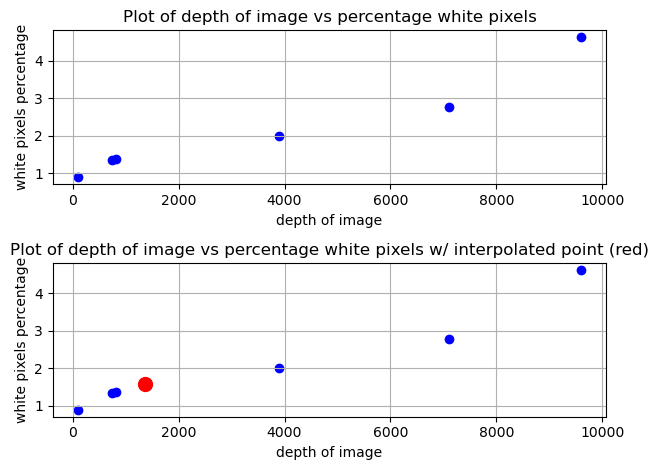

In [6]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
   "MASK_SK658 Llobe ch010065.jpg",
   "MASK_SK658 Llobe ch010023.jpg",
   "MASK_SK658 Llobe ch010171.jpg",
   "MASK_SK658 Slobe ch010103.jpg",
   "MASK_SK658 Slobe ch010142.jpg",
   "MASK_SK658 Slobe ch010157.jpg",
            ]
# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    3900,
    100,
    810,
    9600,
    7100,
    750
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels percentage')
axs[0].grid(True)

axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels percentage')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Verify and validate your analysis: 
Our results shows that the deeper you go in a lung, the higher the percentage of fibrosis that will be expected. Our results are supported by previous research on fibrosis where they found that fibrosis typically starts on the pleura, the membrane enclosing each lung, and gets worse as you go deeper within the lungs. (1) This is typically caused due to the fact that as scar continue to build up on the outer layer, it leads into a positive feedback loop of where due to a lack of oxygen, more scarring occurs on the inside and this process continues until it gets to the worse in the center of the lungs. (2) Therefore, the results that we measured using the dataset provided to us, are accurate with revelant research that has been conducted, showing that the severity of fibrosis is expected to increase with deeper depths within the lungs. 

(1) https://jcp.bmj.com/content/jclinpath/66/10/896.full.pdf
(2) https://www.nature.com/articles/s41379-021-00889-5.pdf

## Conclusions and Ethical Implications: 
From the dataset provided to us, our analysis shows that the severity of fibrosis scarring should increase with the deepness within the lungs. Our data anaylsis also provided a decently accurate interpolation of expected fibrosis scarring at different depths within the lung. Therefore, the overall conclusion is that severity of fibrosis scarring does indeed increase with how deep within the lungs and that from the data we anaylzed, it can be accurately predicted how much fibrosis scarring should be expected from depths of 45 to 10000 microns (µm). (This is due to the limitation of the data set provided to us, ranging from 45 to 10000 microns only) From an ethical standpoint, our data anaylsis should still be taken with caution as we only anaylzed 6 images, meaning that there could be some small changes within the lungs at a depth that we did not anaylzed, and as our anaylsis comes from mouse which have different lung traits compared to ours. Therefore while our data interpolation shows an decently accurate prediction of expected fibrosis scarring, it should still be taken with some caution as various other factors could also effect level of scarring such as genetical factors, lifestyle choice factors, and age factors. Its important for clinicians who use our data interpolation to still do more tests and checkups on the patient instead of solely relying on the data results we generated.

## Limitations and Future Work: 
A key limitation of our experiment is that we used mouse samples which means that our results cannot be entirely concluded onto humans and that we only know that the mouse were injected with a chemical to induce fibrosis, meaning that the rate and severity could change with actual patients with fibrosis as the chemicals used could have enhanced some properties of fibrosis or reduced some properites of fibrosis. Some future works that could be done would be maybe examining actual human fibrosis lungs and seeing whether or not some lifestyle choices or genetic factors affected severity of fibrosis. It may also be better in the future if images without as much background noise could be anaylzed as that way the data analyzed could be more accurate to predict the percent of fibrosis expected at each depth within the lung. Lastly, with better anaylsis methods and more revelant data to anaylsis, it maybe be possible for doctors to more reliably use the our data and determine, how deep or severe a patient has fibrosis. 

## NOTES FROM YOUR TEAM: 
* We filled out the general information about this project: Title, Goal, and Background.
* We copied the completed code for 6 of the images from different depths into the Data Analysis section. 
* We filled put the Data Set section based on the project's question, code, and background information. 

## QUESTIONS FOR YOUR TA: 
* Should we add more images to the code to compare for the data?
* How should we correctly cite the images we used in the Data Set section?